<a href="https://colab.research.google.com/github/fnasird/stock-price-movement-predictor/blob/main/Stock_Price_Movement_Predictor_(LSTM_GRU).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-3248927703.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("AAPL", start="2018-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed


--- Logistic Regression ---
Accuracy: 0.4415954415954416
Confusion Matrix:
 [[144   8]
 [188  11]]
Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.95      0.60       152
           1       0.58      0.06      0.10       199

    accuracy                           0.44       351
   macro avg       0.51      0.50      0.35       351
weighted avg       0.52      0.44      0.31       351



--- Random Forest ---
Accuracy: 0.49572649572649574
Confusion Matrix:
 [[115  37]
 [140  59]]
Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.76      0.57       152
           1       0.61      0.30      0.40       199

    accuracy                           0.50       351
   macro avg       0.53      0.53      0.48       351
weighted avg       0.54      0.50      0.47       351



Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.5504 - loss: 0.6900 - val_accuracy: 0.5143 - val_loss: 0.6923
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5378 - loss: 0.6918 - val_accuracy: 0.4857 - val_loss: 0.6919
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5400 - loss: 0.6905 - val_accuracy: 0.5143 - val_loss: 0.6926
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5393 - loss: 0.6906 - val_accuracy: 0.5143 - val_loss: 0.6926
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5417 - loss: 0.6898 - val_accuracy: 0.5143 - val_loss: 0.6923
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5436 - loss: 0.6912 - val_accuracy: 0.5143 - val_loss: 0.6926
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5375 - loss: 0.6922 - val_accuracy: 0.5214 - val_loss: 0.6928
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5388 - loss: 0.6902 - val_accuracy: 0.5286 - val_loss: 0.6932
Ep

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


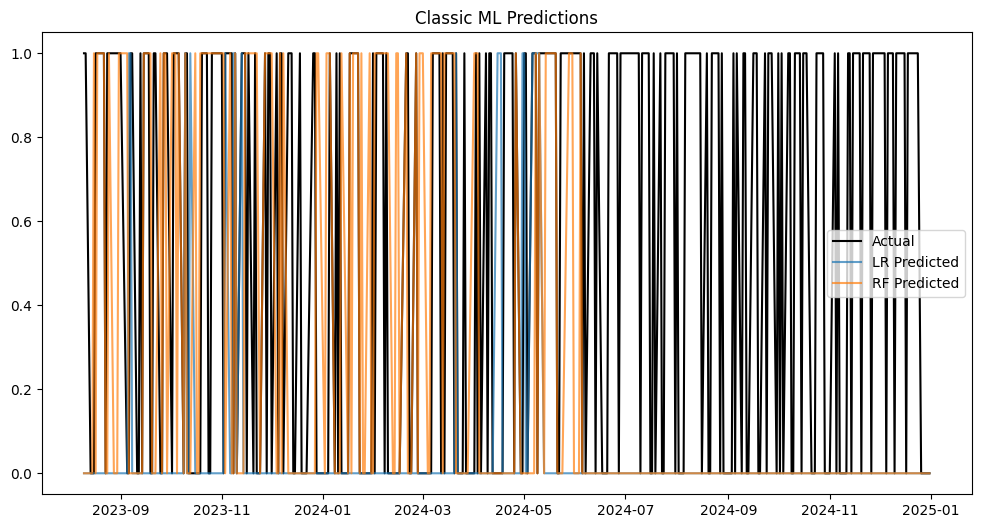

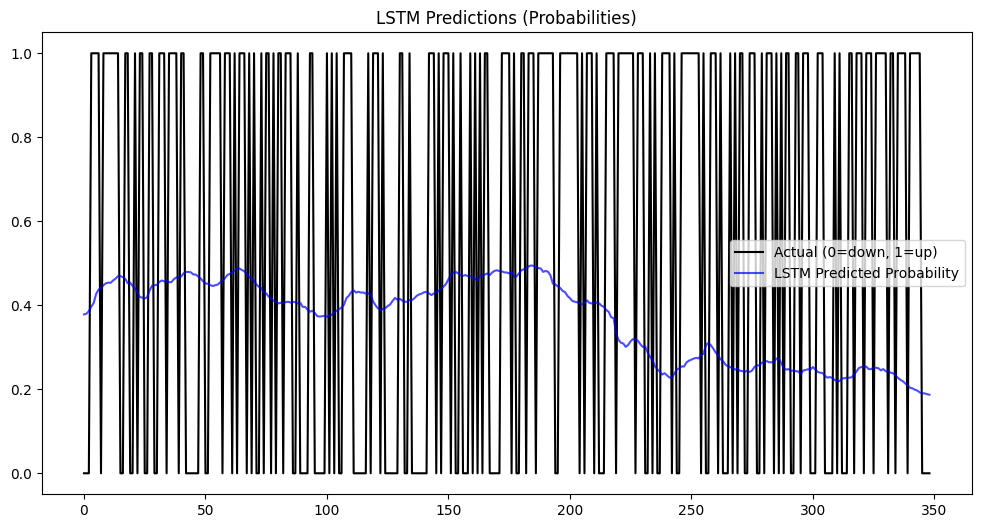

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, GRU


# Fetch data
df = yf.download("AAPL", start="2018-01-01", end="2025-01-01")

# Features for ML
df['Return'] = df['Close'].pct_change()
df['MA5'] = df['Close'].rolling(5).mean()
df['MA10'] = df['Close'].rolling(10).mean()

# Target variable
df['Target'] = (df['Return'].shift(-1) > 0).astype(int)
df = df.dropna()


df = df.dropna() #drop rows with incomplete information

#Train-Test Split
X = df[['Return', 'MA5', 'MA10']]
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

def evaluate(y_true, y_pred, model_name):
    print(f"--- {model_name} ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    print("\n")

evaluate(y_test, y_pred_lr, "Logistic Regression")
evaluate(y_test, y_pred_rf, "Random Forest")

# Prepare sequences for LSTM
features = ['Return', 'MA5', 'MA10']
X_dl = df[features].values
y_dl = df['Target'].values

# Scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_dl)

def create_sequences(X, y, time_steps=10):
    X_seq, y_seq = [], []
    for i in range(time_steps, len(X)):
        X_seq.append(X[i-time_steps:i])
        y_seq.append(y[i])
    return np.array(X_seq), np.array(y_seq)

TIME_STEPS = 10
X_seq, y_seq = create_sequences(X_scaled, y_dl, TIME_STEPS)

split = int(0.8 * len(X_seq))
X_train_dl, X_test_dl = X_seq[:split], X_seq[split:]
y_train_dl, y_test_dl = y_seq[:split], y_seq[split:]

# LSTM Model
lstm_model = Sequential()
lstm_model.add(LSTM(50, input_shape=(X_train_dl.shape[1], X_train_dl.shape[2]), return_sequences=False))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1, activation='sigmoid'))

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_train_dl, y_train_dl, epochs=50, batch_size=32, validation_split=0.1, shuffle=False)

# Predictions
y_pred_probs = lstm_model.predict(X_test_dl).flatten()  # probabilities in [0,1]
y_pred_dl = (y_pred_probs > 0.5).astype(int)

evaluate(y_test_dl, y_pred_dl, "LSTM Deep Learning")


#Visualization
df_test = df.iloc[len(X_train):].copy()
df_test["LR_Predicted"] = y_pred_lr
df_test["RF_Predicted"] = y_pred_rf

plt.figure(figsize=(12,6))
plt.plot(df_test.index, df_test["Target"], label='Actual', color='black')
plt.plot(df_test.index, df_test["LR_Predicted"], label='LR Predicted', alpha=0.7)
plt.plot(df_test.index, df_test["RF_Predicted"], label='RF Predicted', alpha=0.7)
plt.title("Classic ML Predictions")
plt.legend()
plt.show()

plt.figure(figsize=(12,6))
plt.plot(y_test_dl, label='Actual (0=down, 1=up)', color='black')
plt.plot(y_pred_probs, label='LSTM Predicted Probability', alpha=0.7, color='blue')
plt.title("LSTM Predictions (Probabilities)")
plt.legend()
plt.show()

